<a href="https://colab.research.google.com/github/ndsoi/ndsoi/blob/main/%E7%BA%BF%E6%80%A7%E5%88%86%E7%B1%BB%E5%99%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

目标：完成一个线性分类器的实战

导入相应的库

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

step1: 生成样本数据
具体来说就是生成两类线性可分的点，并绘制图像


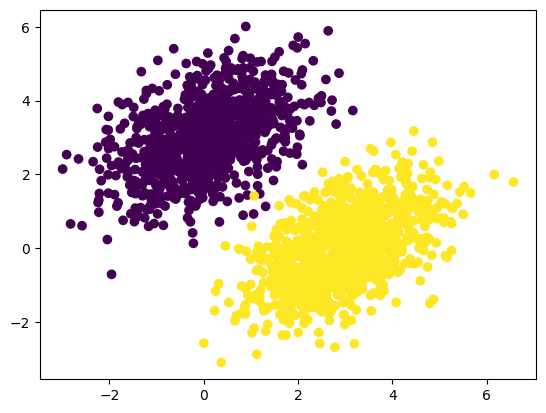

In [3]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0,3],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean = [3,0],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_class
)

# 合并两个样本
inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)

# 生成标签
targets = np.vstack(((np.zeros((num_samples_per_class,1),dtype="float32")),np.ones((num_samples_per_class,1),dtype="float32"))).astype(np.float32)


# 画图
plt.scatter(inputs[:,0],inputs[:,1],c=targets[:,0])
plt.show()


step2:定义模型<br>
数据集简单，因此模型也只需定义一层维度 y = W*x+b

In [4]:
input_dim = 2 # (2000,2)
output_dim = 1  # 输出标签是0还是1，只需一位

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

def model(inputs):
  return tf.matmul(inputs,W)+b

step3:定义损失函数，采用均方差

In [5]:
def square_loss(targets,predictions):
  per_samples_losses = tf.square(targets-predictions)
  return tf.reduce_mean(per_samples_losses)

step4:定义一次训练过程：<br>
1)接受input和真实标签<br>
2)获取预测值<br>
3)计算损失函数<br>
4)求梯度<br>
5)更新参数

In [6]:
lr = 1e-1

def train_one_step(inputs,targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    losses = square_loss(targets,predictions)
    grad_W,grad_b = tape.gradient(losses,[W,b])
    W.assign_sub(lr*grad_W)
    b.assign_sub(lr*grad_b)
    return losses


step5:开始训练<br>
为简单，采用批量更新【即所有样本都参与一次参数更新】而不是采用小批量更新<br>


In [7]:
epoches = 40

for i in range(epoches):
  cur_loss = train_one_step(inputs,targets)
  print(f"epoch:{i}, loss:{cur_loss:.2f}")


epoch:0, loss:3.76
epoch:1, loss:0.49
epoch:2, loss:0.18
epoch:3, loss:0.13
epoch:4, loss:0.12
epoch:5, loss:0.11
epoch:6, loss:0.10
epoch:7, loss:0.09
epoch:8, loss:0.09
epoch:9, loss:0.08
epoch:10, loss:0.08
epoch:11, loss:0.07
epoch:12, loss:0.07
epoch:13, loss:0.07
epoch:14, loss:0.06
epoch:15, loss:0.06
epoch:16, loss:0.06
epoch:17, loss:0.05
epoch:18, loss:0.05
epoch:19, loss:0.05
epoch:20, loss:0.05
epoch:21, loss:0.05
epoch:22, loss:0.04
epoch:23, loss:0.04
epoch:24, loss:0.04
epoch:25, loss:0.04
epoch:26, loss:0.04
epoch:27, loss:0.04
epoch:28, loss:0.04
epoch:29, loss:0.04
epoch:30, loss:0.04
epoch:31, loss:0.03
epoch:32, loss:0.03
epoch:33, loss:0.03
epoch:34, loss:0.03
epoch:35, loss:0.03
epoch:36, loss:0.03
epoch:37, loss:0.03
epoch:38, loss:0.03
epoch:39, loss:0.03


step6:用训练好的模型分类点，画出分类后的结果图

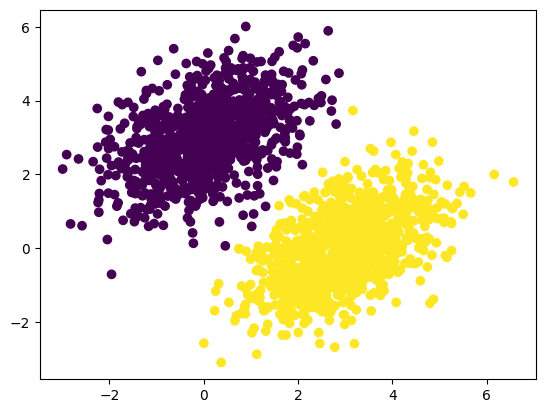

In [8]:
predictions = model(inputs)
plt.scatter(inputs[:,0],inputs[:,1],c=predictions[:,0]>0.5)
plt.show()

绘制分类器对应的直线<br>
1)先生成若干等间隔的点，用来练成直线<br>
2)写出直线的方程<br>
3)绘制直线<br>
4)绘制散点<br>

注意 线和散点绘制在同一张图上

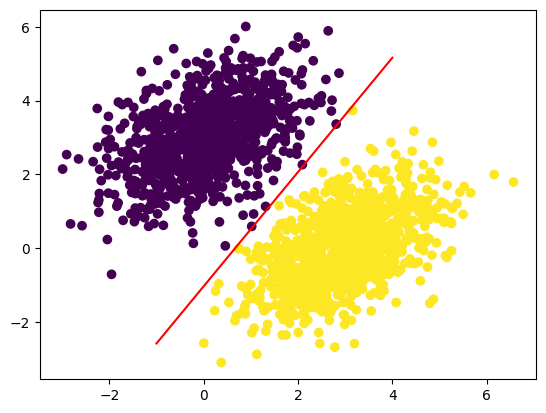

In [10]:
x = np.linspace(-1,4,100)
y = -W[0]/W[1]*x + (0.5-b)/W[1]

plt.plot(x,y,"-r")
plt.scatter(inputs[:,0],inputs[:,1],c=predictions[:,0]>0.5)